# Predicting Heart Disease

Based on the given clinical dataset, Predict whether the patient having **Heart Disease** *or* **Not having Heart Disease**

*Dataset From*: https://www.kaggle.com/ronitf/heart-disease-uci

**Attributes of the Dataset:**

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



In [68]:
# Imports for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import for Experimentation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, plot_roc_curve

# This is specifically for code push
import warnings
warnings.filterwarnings('ignore')

# Get the Data

In [69]:
# Importing the data and storing it in a variable name "data"
data = pd.read_csv("heart-disease.csv")

In [70]:
# There are 14 - Columns and 303 - Rows in our Dataset
data.shape

(303, 14)

In [71]:
# Displaying first 5 data in the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
# Displaying last 5 data in the dataset
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Visualizing Total Patients with Heart Disease/No Heart Disease

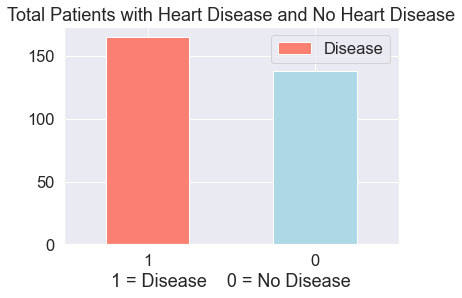

In [73]:
# Plotting data 
data["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"] )
plt.title("Total Patients with Heart Disease and No Heart Disease")
plt.xlabel("1 = Disease    0 = No Disease")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation=0);

In [74]:
# checking whether our dataset contains any NULL values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [75]:
# Checking Total no of Males/Females
data["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [76]:
# Displaying and comparing Male and Female with Heart Disease and without Heart Disease 
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


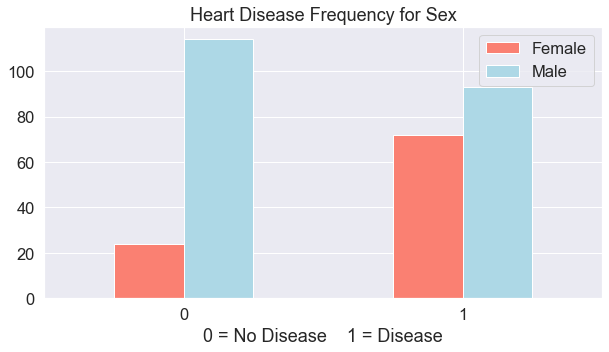

In [77]:
# Visualizing the above data 
pd.crosstab(data.target, data.sex).plot(kind="bar", figsize=(10, 5), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease    1 = Disease")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

# Comparing Heart Rate with Age

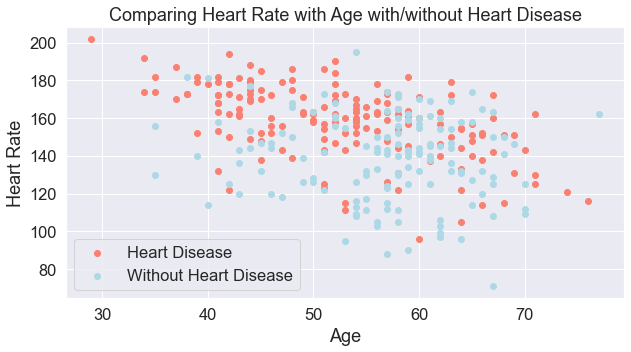

In [78]:
plt.figure(figsize=(10, 5))

# Patient with Heart Disease
plt.scatter(data.age[data.target == 1], data.thalach[data.target == 1], c=["salmon"])

# Patient without Heart Disease
plt.scatter(data.age[data.target == 0], data.thalach[data.target == 0], c=["lightblue"])

plt.title("Comparing Heart Rate with Age with/without Heart Disease")

plt.xlabel("Age")

plt.ylabel("Heart Rate")

plt.legend(["Heart Disease", "Without Heart Disease"]);

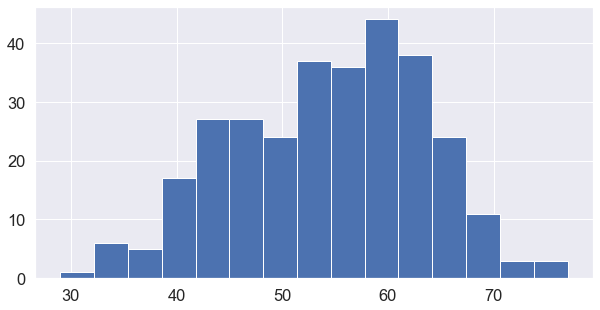

In [79]:
# Visualizing the Distribution Of Age in our Data Set

data.age.hist(figsize=(10, 5), bins=15);

# Heart Disease Frequency per Chest Pain Type

**Chest Pain Type:**
   * **Value 1:** Typical Angina
   * **Value 2:** Atypical Angina
   * **Value 3:** Non-Anginal Pain
   * **Value 4:** Asymptomatic

In [80]:
# comparing patients of different chest pain with/without heart disease

pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


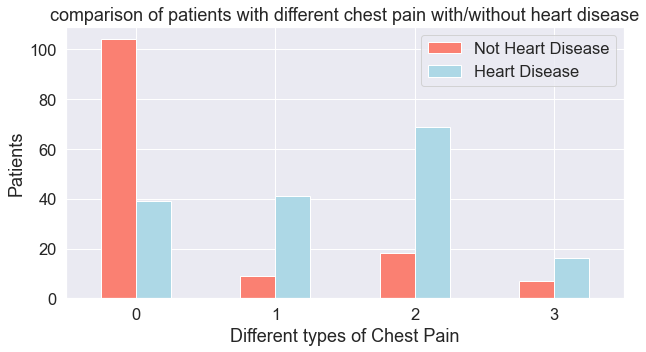

In [81]:
# Visualizing the comparison of patients with different chest pain with/without heart disease

pd.crosstab(data.cp, data.target).plot(kind="bar", figsize=(10, 5), color=["salmon", "lightblue"])

plt.title("comparison of patients with different chest pain with/without heart disease")

plt.xlabel("Different types of Chest Pain")

plt.ylabel("Patients")

plt.legend(["Not Heart Disease", "Heart Disease"])

plt.xticks(rotation=0);

# Visualize our Dataset with Correlation Matrix

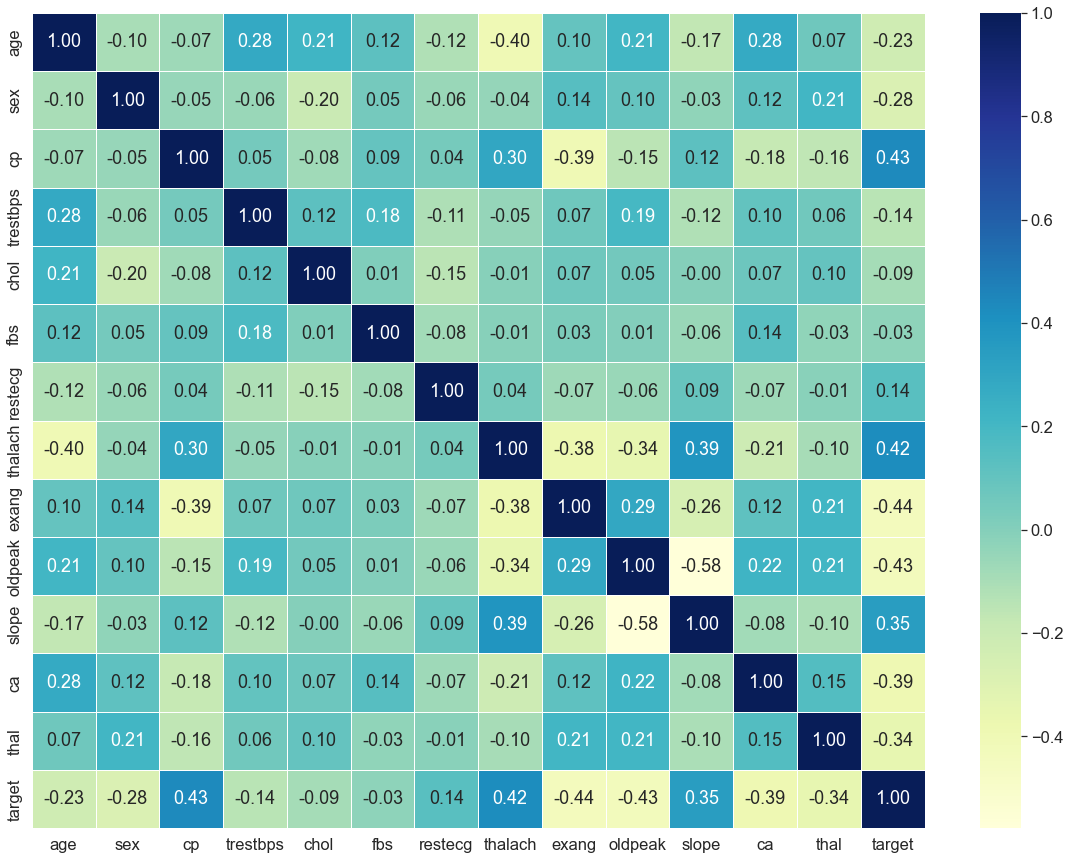

In [82]:
corr_mat = data.corr()
fig, ax = plt.subplots(figsize=(20,15))

ax = sns.heatmap(cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5, data=corr_mat);

# Modelling

In [83]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
# Split our dataset into training data and test data for out model

np.random.seed(42)
# Independent Varaiable
x = data.drop("target", axis=1)

# Dependent Variable
y = data["target"]

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**Modelling/Experimenting training/test data with the following models/estimators:**
   1. RandomForestClassifier.
   2. LogisticRegression.
   3. KNeighborsClassifier.

In [85]:
# storing models in a dictionary

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    '''
        This is function to train the give model with the training data and testing with the test data.
        model: contains dictionary of different models
        x_train: Training data of the independent variable
        y_train: Training data of the dependent/target variable
        x_test: Test data of the independent variable
        y_test: Test data of the dependent/target variable
    '''
    np.random.seed(42)
    
    # Dictionary for model scores
    model_scores = {}
    
    for model_name, model in models.items():
        # Fit the model with training data
        model.fit(x_train, y_train)
        
        # Save the score in the dictionary
        model_scores[model_name] = model.score(x_test, y_test)
    
    return model_scores

In [86]:
# Train and test our data
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)

In [87]:
# Model Scores
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

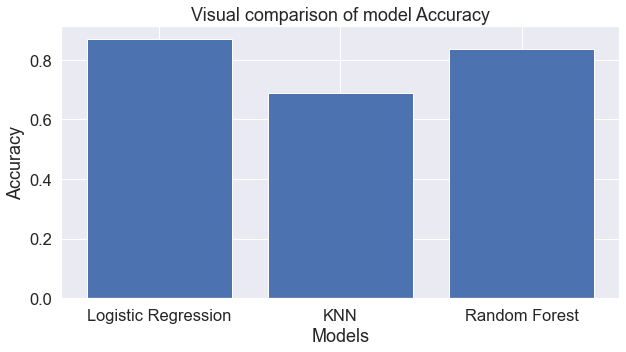

In [88]:
# Model Accuracy comparison visually
plt.figure(figsize=(10,5))

plt.bar(x = model_scores.keys(), height=model_scores.values())

plt.title("Visual comparison of model Accuracy")

plt.xlabel("Models")

plt.ylabel("Accuracy");

# Hyperparameter tuning

In [89]:
# Tunning KNN
train_scores = []
test_scores = []

knn = KNeighborsClassifier()
n_neighbors = range(1, 21)

for i in n_neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

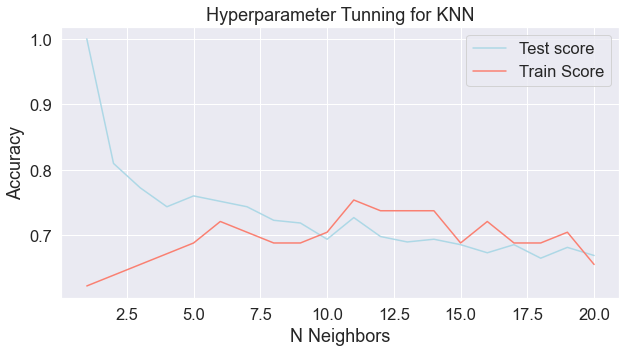

In [90]:
plt.figure(figsize=(10, 5))
plt.plot(n_neighbors, train_scores, label="train scores" , c="lightblue")

plt.plot(n_neighbors, test_scores, label="test scores", c="salmon" )

plt.xlabel("N Neighbors")

plt.ylabel("Accuracy")

plt.title("Hyperparameter Tunning for KNN")

plt.legend(["Test score", "Train Score"]);

# Tunning Logistic Regression and Random Forest Classifier with RandomizedSearchCV

In [91]:
# Best params for Logistic Regression
lr_params = {
    "solver": ['liblinear'],
    "penalty": ['l1', 'l2'],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Best Params for Random Forest Classifier
rf_params = {'bootstrap': [True, False],
             'max_depth': [None, 3, 5, 10],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 3, 4],
             'min_samples_split': [2, 6, 10],
             'n_estimators': np.arange(5, 1000, 50)}

In [92]:
# Testing Logistic Regression with New parameters
np.random.seed(42)

lr = LogisticRegression()

rs_lr = RandomizedSearchCV(lr, lr_params, n_iter=100, n_jobs=-1,cv=5 , verbose=True, random_state=42)

rs_lr.fit(x_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42, verbose=True)

In [93]:
# Testing Random Forest Classifier with New parameters
np.random.seed(42)

rfc = RandomForestClassifier()

rs_rfc = RandomizedSearchCV(rfc, rf_params, n_iter=100, n_jobs=-1,cv=5 , verbose=True, random_state=42)

rs_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': array([  5,  55, 105, 155, 205, 255, 305, 355, 405, 455, 505, 555, 605,
       655, 705, 755, 805, 855, 905, 955])},
                   random_state=42, verbose=True)

In [94]:
# Score for Logistic Regression and Random Forest Classifier after Hyperparameter Tunning

np.random.seed(42)
# Score for Logistic Regression
lr_score = rs_lr.score(x_test, y_test)

# Score for Random Forest Classifier
rf_score = rs_rfc.score(x_test, y_test)

score = {
    "Logistic Regression": lr_score, 
    "Random Forest Classifier": rf_score
}

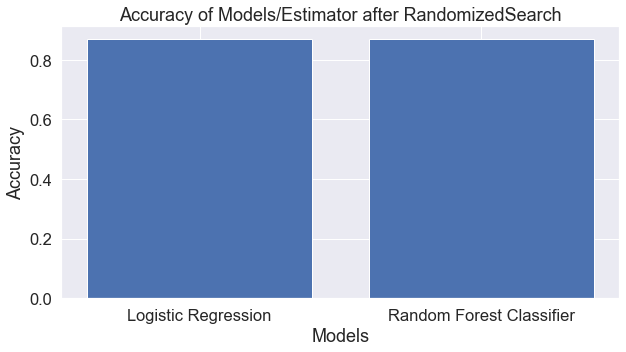

In [95]:
plt.figure(figsize=(10,5))

plt.bar(x=score.keys(),height=list(score.values()))

plt.title("Accuracy of Models/Estimator after RandomizedSearch")


plt.xlabel("Models")

plt.ylabel("Accuracy");

# Tunning Logistic Regression and Random Forest Classifier with GridSearchCV

In [96]:
# Params for Logistic Regression

lr_GridParams = {
    "C": np.logspace(-4, 4, 30),
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "max_iter": [4000]
}

rf_GridParams = {
    "n_estimators": [10, 100, 1000],
    "max_features": ['sqrt', 'log2'],
    "max_features": ['sqrt', 'log2']
}

In [97]:
# GridSearch with Logistic Regression
np.random.seed(42)
lr = LogisticRegression()

gs_lr = GridSearchCV(lr, lr_GridParams,  cv=5, verbose=True)

gs_lr.fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'max_iter': [4000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [98]:
# GridSearch with Random Forest Classifier
np.random.seed(42)

rf = RandomForestClassifier()

gs_rf = GridSearchCV(rf, rf_GridParams,  cv=5, verbose=True)

gs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             verbose=True)

In [99]:
# Score for Logistic Regression and Random Forest Classifier after Hyperparameter Tunning with GridSearch

np.random.seed(42)
# Score for Logistic Regression
gs_lr_score = gs_lr.score(x_test, y_test)

# Score for Random Forest Classifier
gs_rf_score = gs_rf.score(x_test, y_test)

gridSearch_score = {
    "Logistic Regression": gs_lr_score, 
    "Random Forest Classifier": gs_rf_score
}

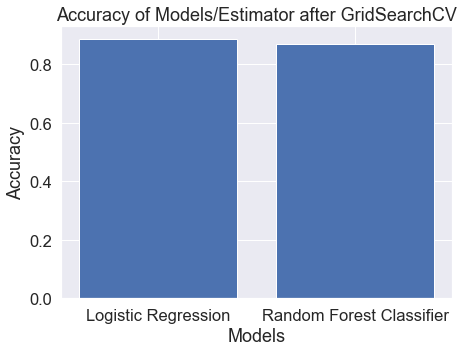

In [100]:
# we are getting same result/accuracy

plt.figure(figsize=(7,5))

plt.bar(x=gridSearch_score.keys(),height=list(gridSearch_score.values()))

plt.title("Accuracy of Models/Estimator after GridSearchCV")


plt.xlabel("Models")

plt.ylabel("Accuracy");

# Evaluate Tuned Model
   1. Roc curve and Auc Curve
   2. Confusion Matrix
   3. Classification Report
   4. precision
   5. Recall
   6. F1-score

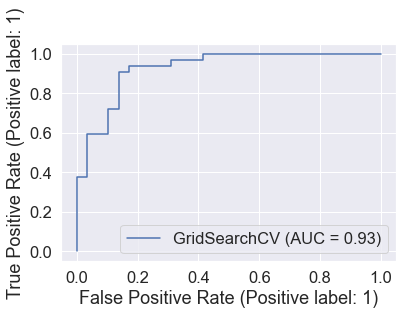

In [101]:
#  PLot ROC Curve
plot_roc_curve(gs_lr, x_test, y_test);

In [102]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(5,5))
    
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    


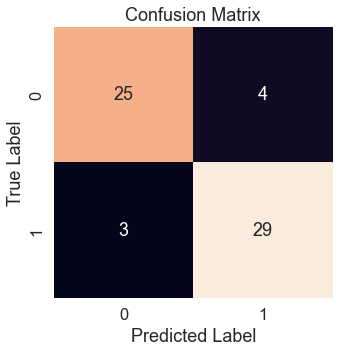

In [103]:
# make prediction with tuned model
y_preds = gs_lr.predict(x_test)

# plot confusion matrix
plot_conf_mat(y_test, y_preds);

In [104]:
# Display Classification Report 
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Evaluate using cross validation**
  1. precision
  2. recall
  3. f1 score

In [105]:
# check best params
gs_lr.best_params_

{'C': 0.20433597178569418, 'max_iter': 4000, 'solver': 'liblinear'}

In [106]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [107]:
# Cross Validated Accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy").mean()

# Cross Validated Precision
cv_prec = cross_val_score(clf, x, y, cv=5, scoring="precision").mean()

# Cross Validated Recall
cv_rec = cross_val_score(clf, x, y, cv=5, scoring="recall").mean()

# Cross Validated F1 score
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1").mean()

In [108]:
print("Accuracy:", cv_acc,"\n")
print("Precision:", cv_prec,"\n")
print("Recall:", cv_rec,"\n")
print("F1 score:", cv_f1,"\n")

Accuracy: 0.8446994535519124 

Precision: 0.8207936507936507 

Recall: 0.9212121212121213 

F1 score: 0.8673007976269721 



Text(0.5, 0, 'Metrics')

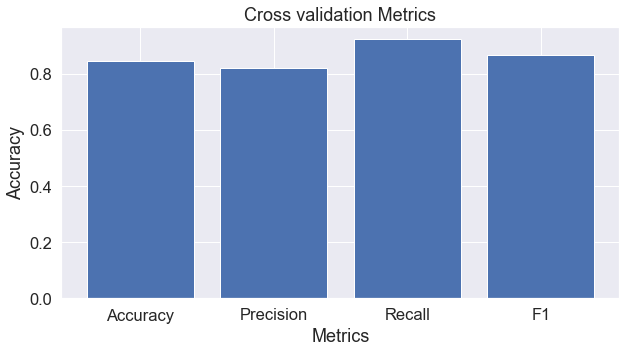

In [109]:
# Display the Cross Validation Metrics
cv_metrics ={"Accuracy": cv_acc, "Precision": cv_prec, "Recall": cv_rec, "F1": cv_f1}

plt.figure(figsize=(10,5))
plt.bar(x=cv_metrics.keys(), height=list(cv_metrics.values()))
plt.title("Cross validation Metrics")
plt.ylabel("Accuracy")
plt.xlabel("Metrics")

# Feature Importance


In [110]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

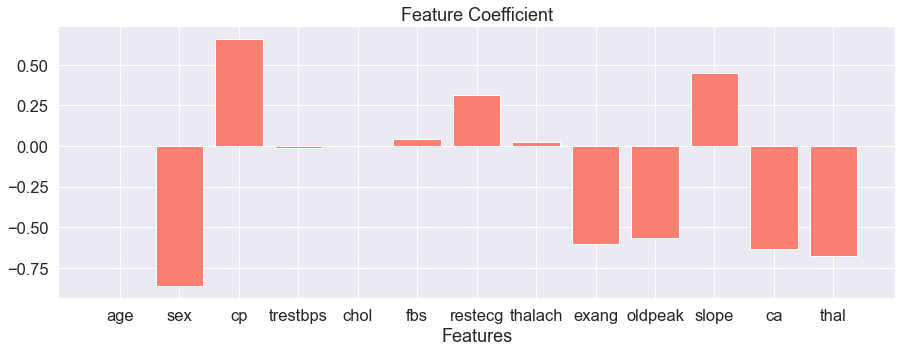

In [111]:
coeff_arr = clf.coef_
feat_dict = dict(zip(data.columns, list(coeff_arr[0])))

plt.figure(figsize=(15,5))
plt.bar(x=feat_dict.keys(), height=list(feat_dict.values()), color="salmon")

plt.title("Feature Coefficient")

plt.xlabel("Features");